# Lab Assignment 2

In the third assignment you will classify hand-written digits using logistic regression.

The assignment follows Andrew Ng's explanation of Logistic Regression and (re)watching his videos could be useful (Week 3)

Publish your notebook (ipynb file) to your Machine Learning () repository on Github.

### Deadline October 26th, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Scikit-learn has the dataset built in. The dataset contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the following cell shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

The numbers shown are: 
[[0 1 2 3 4]
 [5 6 7 8 9]]


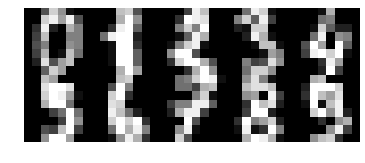

In [10]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)), interpolation= "nearest")

print "The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10]))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. Also pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner.

Plot how your score on the test set improves over time. My best score was about 85% correct!

Make sure to comment your code.

In [11]:
#Make a prediction function h
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def prediction_function(x,theta):
    #must be shape 10x1
    h = sigmoid(np.dot(theta.T, x))
    return h




In [12]:
#Use the output of that function to compute the cost function J: !!!!IGNORE FOR NOW!!!!!
#def cost_function(x_predict,y):
#    -1/m*(np.sum([y*np.log(x_predict) +(1-y)*np.log(1-x_predict)])) #cost funciton of 1 example
    


In [27]:
#Create a function that returns the gradient values, given h (x_predict), y and x:

#!!consider matrix dimensions!!
def compute_gradient(x_predict, y, x):
    #m = x_predict.size
    result = np.outer(x_predict - y, x[j,:]) #multiplies such that 10x1 *outer* 1x64 => 10x64
    return result



/Users/tax/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


TypeError: unsupported operand type(s) for +: 'int' and 'str'

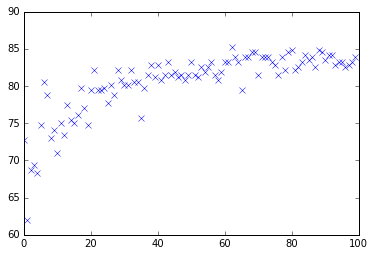

In [190]:
#Choose a suitable learning rate
alpha = 0.5
iterations = 100
theta = np.zeros((64,10))

#It is important to check that you're not overfitting by testing your prediction on a testset
x = np.reshape(digits.images[:1500],(1500,64)) #A 1500x8x8 matrix is reshaped to 1500x64
x_test = np.reshape(digits.images[1500:],(297,64)) #seperating into learning set and test set

target = digits.target[:1500] 
target_test = digits.target[1500:]

#print x[0,:]
#print x[0,:].shape
#print digits.images[1500:].shape
#print x_test.shape
correct_array = []
q = []
for i in range(iterations):
    learning_graph = 0
    for j in range(x.shape[0]):
        
        x_predict = prediction_function(x[j,:].T,theta)
        y = np.zeros(10)
        y[target[j]] = 1
        theta_temp = alpha*compute_gradient(x_predict, y, x)
        theta = theta - theta_temp.T
    #saves the amount of correct predictions and the iterations simultaniously
    correct_array = np.append(correct_array, (isCorrect(x_test, target_test)))
    q = np.append(q, i)
        
        #print y
        #print isCorrect(i,y)
        #correct = correct + isCorrect(i,y)
        #print i    

#print correct_array
#returns a graph with the percentage of correct fits, it unfortunately does not beat the 85% correctness. 
percentage_correct = (correct_array / x_test.shape[0])*100
plt.plot(q, percentage_correct, 'x')
plt.show

#x = x test samples, y = target test samples
def isCorrect(x, y):
    correct = 0
    for i in range(x_test.shape[0]):
        #checks whether the the highest probability, highest number in the array returned by the prediction function
        #is equal to the target_test of that particular sample. And keeps count how many times this is the case.
        if np.equal(np.argmax(prediction_function(x[i,:], theta)),y[i]):
            correct = correct + 1
    return correct

print isCorrect(x_test, target_test) + "out of 297 correct"